<a href="https://colab.research.google.com/github/csharpconsultant/lucechoice/blob/main/horse_race_sims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Red win probability: 0.50
Green win probability: 0.32
Blue win probability: 0.17
Red second probability: 0.59
Green second probability: 0.41
Blue second probability: 0.00

When Red wins:
  Empirical second-place probability for Green: 0.610
  Theoretical second-place probability for Green: 0.655
  Empirical second-place probability for Blue: 0.390
  Theoretical second-place probability for Blue: 0.345

When Green wins:
  Empirical second-place probability for Red: 0.393
  Theoretical second-place probability for Red: 0.253
  Empirical second-place probability for Blue: 0.393
  Theoretical second-place probability for Blue: 0.253

When Blue wins:
  Empirical second-place probability for Red: 0.487
  Theoretical second-place probability for Red: 0.392
  Empirical second-place probability for Green: 0.513
  Theoretical second-place probability for Green: 0.608


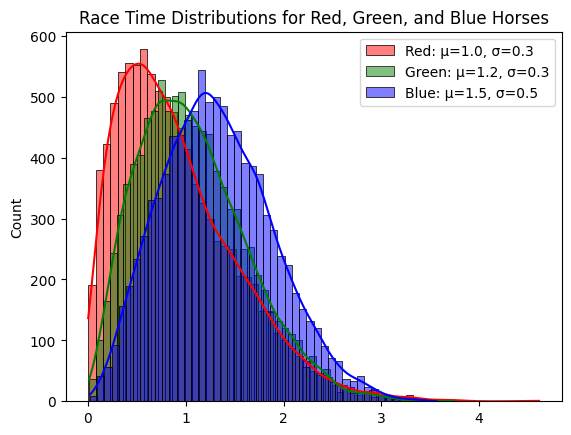

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of races to simulate
num_races = 10000

# Gumbel distribution parameters (mean and scale)
horse_red_params = {'loc': 1.0, 'scale': 0.3}
horse_green_params = {'loc': 1.2, 'scale': 0.3}
horse_blue_params = {'loc': 1.5, 'scale': 0.5}

# Example of using the Weibull distribution
red_times = np.random.weibull(a=1.5, size=num_races) * 1.0
green_times = np.random.weibull(a=2.0, size=num_races) * 1.2
blue_times = np.random.weibull(a=2.5, size=num_races) * 1.5




# Stack all times into a matrix
all_times = np.stack([red_times, green_times, blue_times], axis=1)

# Determine the winner in each race by finding the horse with the smallest time
winners = np.argmin(all_times, axis=1)

# Calculate probabilities of each horse winning
red_wins = np.sum(winners == 0) / num_races
green_wins = np.sum(winners == 1) / num_races
blue_wins = np.sum(winners == 2) / num_races

# Print the win probabilities
print(f"Red win probability: {red_wins:.2f}")
print(f"Green win probability: {green_wins:.2f}")
print(f"Blue win probability: {blue_wins:.2f}")

# Function to count second place
def second_place_count(winners, horse_index):
    # Mask to check if the horse came in second by removing the winner's time and checking second place.
    second_place = []
    for i in range(num_races):
        mask = np.delete(all_times[i], winners[i])
        second = np.argmin(mask)
        second_place.append(second)
    second_place = np.array(second_place)
    return np.sum(second_place == horse_index) / num_races

# Calculate the empirical second-place probabilities
red_second = second_place_count(winners, 0)
green_second = second_place_count(winners, 1)
blue_second = second_place_count(winners, 2)

# Print the second-place probabilities
print(f"Red second probability: {red_second:.2f}")
print(f"Green second probability: {green_second:.2f}")
print(f"Blue second probability: {blue_second:.2f}")

# Function to check if Luce Choice Axiom holds
def luce_choice_check(winners, win_probs, horse_order):
    results = []
    for i in range(3):  # Check for each possible winner
        empirical_second_probs = []
        theoretical_second_probs = []

        for j in range(3):  # Check for each horse being second
            if i != j:
                # Calculate empirical second-place probability when horse i wins
                mask = winners == i
                remaining_times = np.delete(all_times[mask], i, axis=1)
                empirical_second = np.mean(np.argmin(remaining_times, axis=1) == (j if j < i else j-1))

                # Calculate the theoretical second-place probability based on Luce's axiom
                theoretical_second = win_probs[j] / (1 - win_probs[i])

                empirical_second_probs.append(empirical_second)
                theoretical_second_probs.append(theoretical_second)

        results.append({
            'winner': horse_order[i],
            'empirical_second_probs': empirical_second_probs,
            'theoretical_second_probs': theoretical_second_probs
        })
    return results

# Check if Luce Choice Axiom holds
horse_order = ['Red', 'Green', 'Blue']
win_probs = [red_wins, green_wins, blue_wins]
luce_results = luce_choice_check(winners, win_probs, horse_order)

# Display results
for result in luce_results:
    print(f"\nWhen {result['winner']} wins:")
    for j, horse in enumerate(horse_order):
        if horse != result['winner']:
            print(f"  Empirical second-place probability for {horse}: {result['empirical_second_probs'][j-1]:.3f}")
            print(f"  Theoretical second-place probability for {horse}: {result['theoretical_second_probs'][j-1]:.3f}")

# Plot the distributions for visual reference
sns.histplot(red_times, color="red", kde=True, label=f"Red: μ={horse_red_params['loc']}, σ={horse_red_params['scale']}")
sns.histplot(green_times, color="green", kde=True, label=f"Green: μ={horse_green_params['loc']}, σ={horse_green_params['scale']}")
sns.histplot(blue_times, color="blue", kde=True, label=f"Blue: μ={horse_blue_params['loc']}, σ={horse_blue_params['scale']}")
plt.legend()
plt.title("Race Time Distributions for Red, Green, and Blue Horses")
plt.show()


Red win probability: 0.72
Green win probability: 0.23
Blue win probability: 0.05
Red second probability: 0.76
Green second probability: 0.24
Blue second probability: 0.00

When Red wins:
  Empirical second-place probability for Green: 0.736
  Theoretical second-place probability for Green: 0.810
  Empirical second-place probability for Blue: 0.264
  Theoretical second-place probability for Blue: 0.190

When Green wins:
  Empirical second-place probability for Red: 0.151
  Theoretical second-place probability for Red: 0.069
  Empirical second-place probability for Blue: 0.151
  Theoretical second-place probability for Blue: 0.069

When Blue wins:
  Empirical second-place probability for Red: 0.343
  Theoretical second-place probability for Red: 0.240
  Empirical second-place probability for Green: 0.657
  Theoretical second-place probability for Green: 0.760


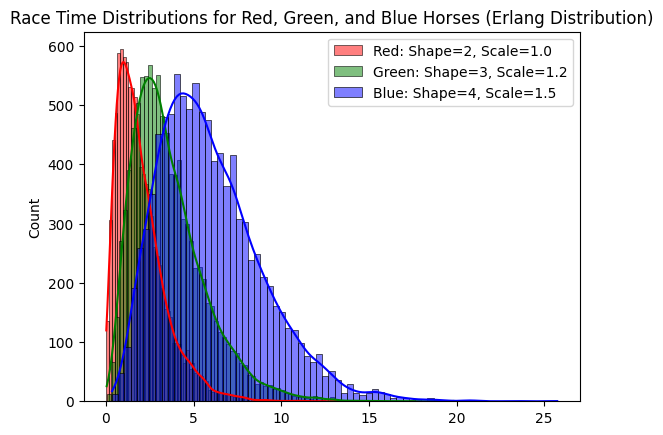

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of races to simulate
num_races = 10000

# Erlang distribution parameters (shape must be an integer, rate is 1/scale)
shape_red = 2
shape_green = 3
shape_blue = 4

# Generate times for each horse in a large number of races using Erlang distribution
red_times = np.random.gamma(shape=shape_red, scale=1.0, size=num_races)  # Erlang distribution for red
green_times = np.random.gamma(shape=shape_green, scale=1.2, size=num_races)  # Erlang for green
blue_times = np.random.gamma(shape=shape_blue, scale=1.5, size=num_races)  # Erlang for blue

# Stack all times into a matrix
all_times = np.stack([red_times, green_times, blue_times], axis=1)

# Determine the winner in each race by finding the horse with the smallest time
winners = np.argmin(all_times, axis=1)

# Calculate probabilities of each horse winning
red_wins = np.sum(winners == 0) / num_races
green_wins = np.sum(winners == 1) / num_races
blue_wins = np.sum(winners == 2) / num_races

# Print the win probabilities
print(f"Red win probability: {red_wins:.2f}")
print(f"Green win probability: {green_wins:.2f}")
print(f"Blue win probability: {blue_wins:.2f}")

# Function to count second place
def second_place_count(winners, horse_index):
    second_place = []
    for i in range(num_races):
        mask = np.delete(all_times[i], winners[i])
        second = np.argmin(mask)
        second_place.append(second)
    second_place = np.array(second_place)
    return np.sum(second_place == horse_index) / num_races

# Calculate the empirical second-place probabilities
red_second = second_place_count(winners, 0)
green_second = second_place_count(winners, 1)
blue_second = second_place_count(winners, 2)

# Print the second-place probabilities
print(f"Red second probability: {red_second:.2f}")
print(f"Green second probability: {green_second:.2f}")
print(f"Blue second probability: {blue_second:.2f}")

# Function to check if Luce Choice Axiom holds
def luce_choice_check(winners, win_probs, horse_order):
    results = []
    for i in range(3):  # Check for each possible winner
        empirical_second_probs = []
        theoretical_second_probs = []

        for j in range(3):  # Check for each horse being second
            if i != j:
                # Calculate empirical second-place probability when horse i wins
                mask = winners == i
                remaining_times = np.delete(all_times[mask], i, axis=1)
                empirical_second = np.mean(np.argmin(remaining_times, axis=1) == (j if j < i else j-1))

                # Calculate the theoretical second-place probability based on Luce's axiom
                theoretical_second = win_probs[j] / (1 - win_probs[i])

                empirical_second_probs.append(empirical_second)
                theoretical_second_probs.append(theoretical_second)

        results.append({
            'winner': horse_order[i],
            'empirical_second_probs': empirical_second_probs,
            'theoretical_second_probs': theoretical_second_probs
        })
    return results

# Check if Luce Choice Axiom holds
horse_order = ['Red', 'Green', 'Blue']
win_probs = [red_wins, green_wins, blue_wins]
luce_results = luce_choice_check(winners, win_probs, horse_order)

# Display results
for result in luce_results:
    print(f"\nWhen {result['winner']} wins:")
    for j, horse in enumerate(horse_order):
        if horse != result['winner']:
            print(f"  Empirical second-place probability for {horse}: {result['empirical_second_probs'][j-1]:.3f}")
            print(f"  Theoretical second-place probability for {horse}: {result['theoretical_second_probs'][j-1]:.3f}")

# Plot the distributions for visual reference
sns.histplot(red_times, color="red", kde=True, label=f"Red: Shape={shape_red}, Scale=1.0")
sns.histplot(green_times, color="green", kde=True, label=f"Green: Shape={shape_green}, Scale=1.2")
sns.histplot(blue_times, color="blue", kde=True, label=f"Blue: Shape={shape_blue}, Scale=1.5")
plt.legend()
plt.title("Race Time Distributions for Red, Green, and Blue Horses (Erlang Distribution)")
plt.show()


Red win probability: 0.61
Green win probability: 0.31
Blue win probability: 0.07
Red second probability: 0.75
Green second probability: 0.25
Blue second probability: 0.00

When Red wins:
  Empirical second-place probability for Green: 0.746
  Theoretical second-place probability for Green: 0.809
  Empirical second-place probability for Blue: 0.254
  Theoretical second-place probability for Blue: 0.191

When Green wins:
  Empirical second-place probability for Red: 0.213
  Theoretical second-place probability for Red: 0.108
  Empirical second-place probability for Blue: 0.213
  Theoretical second-place probability for Blue: 0.108

When Blue wins:
  Empirical second-place probability for Red: 0.418
  Theoretical second-place probability for Red: 0.340
  Empirical second-place probability for Green: 0.582
  Theoretical second-place probability for Green: 0.660


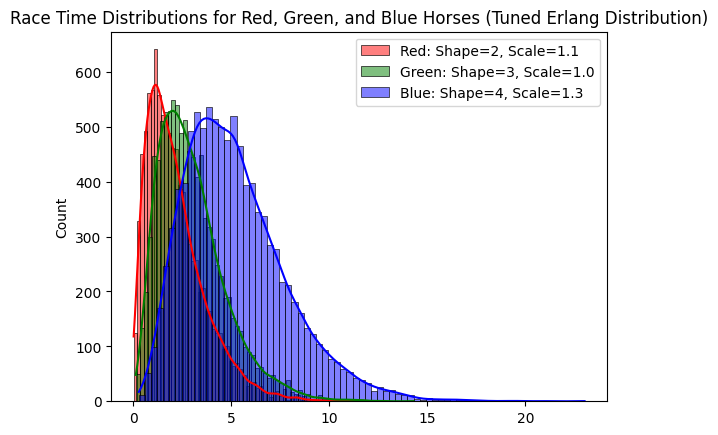

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of races to simulate
num_races = 10000

# Tuned Erlang distribution parameters (shape must be an integer, rate is 1/scale)
shape_red = 2
scale_red = 1.1
shape_green = 3
scale_green = 1.0
shape_blue = 4
scale_blue = 1.3

# Generate times for each horse in a large number of races using Erlang distribution
red_times = np.random.gamma(shape=shape_red, scale=scale_red, size=num_races)  # Erlang distribution for red
green_times = np.random.gamma(shape=shape_green, scale=scale_green, size=num_races)  # Erlang for green
blue_times = np.random.gamma(shape=shape_blue, scale=scale_blue, size=num_races)  # Erlang for blue

# Stack all times into a matrix
all_times = np.stack([red_times, green_times, blue_times], axis=1)

# Determine the winner in each race by finding the horse with the smallest time
winners = np.argmin(all_times, axis=1)

# Calculate probabilities of each horse winning
red_wins = np.sum(winners == 0) / num_races
green_wins = np.sum(winners == 1) / num_races
blue_wins = np.sum(winners == 2) / num_races

# Print the win probabilities
print(f"Red win probability: {red_wins:.2f}")
print(f"Green win probability: {green_wins:.2f}")
print(f"Blue win probability: {blue_wins:.2f}")

# Function to count second place
def second_place_count(winners, horse_index):
    second_place = []
    for i in range(num_races):
        mask = np.delete(all_times[i], winners[i])
        second = np.argmin(mask)
        second_place.append(second)
    second_place = np.array(second_place)
    return np.sum(second_place == horse_index) / num_races

# Calculate the empirical second-place probabilities
red_second = second_place_count(winners, 0)
green_second = second_place_count(winners, 1)
blue_second = second_place_count(winners, 2)

# Print the second-place probabilities
print(f"Red second probability: {red_second:.2f}")
print(f"Green second probability: {green_second:.2f}")
print(f"Blue second probability: {blue_second:.2f}")

# Function to check if Luce Choice Axiom holds
def luce_choice_check(winners, win_probs, horse_order):
    results = []
    for i in range(3):  # Check for each possible winner
        empirical_second_probs = []
        theoretical_second_probs = []

        for j in range(3):  # Check for each horse being second
            if i != j:
                # Calculate empirical second-place probability when horse i wins
                mask = winners == i
                remaining_times = np.delete(all_times[mask], i, axis=1)
                empirical_second = np.mean(np.argmin(remaining_times, axis=1) == (j if j < i else j-1))

                # Calculate the theoretical second-place probability based on Luce's axiom
                theoretical_second = win_probs[j] / (1 - win_probs[i])

                empirical_second_probs.append(empirical_second)
                theoretical_second_probs.append(theoretical_second)

        results.append({
            'winner': horse_order[i],
            'empirical_second_probs': empirical_second_probs,
            'theoretical_second_probs': theoretical_second_probs
        })
    return results

# Check if Luce Choice Axiom holds
horse_order = ['Red', 'Green', 'Blue']
win_probs = [red_wins, green_wins, blue_wins]
luce_results = luce_choice_check(winners, win_probs, horse_order)

# Display results
for result in luce_results:
    print(f"\nWhen {result['winner']} wins:")
    for j, horse in enumerate(horse_order):
        if horse != result['winner']:
            print(f"  Empirical second-place probability for {horse}: {result['empirical_second_probs'][j-1]:.3f}")
            print(f"  Theoretical second-place probability for {horse}: {result['theoretical_second_probs'][j-1]:.3f}")

# Plot the distributions for visual reference
sns.histplot(red_times, color="red", kde=True, label=f"Red: Shape={shape_red}, Scale={scale_red}")
sns.histplot(green_times, color="green", kde=True, label=f"Green: Shape={shape_green}, Scale={scale_green}")
sns.histplot(blue_times, color="blue", kde=True, label=f"Blue: Shape={shape_blue}, Scale={scale_blue}")
plt.legend()
plt.title("Race Time Distributions for Red, Green, and Blue Horses (Tuned Erlang Distribution)")
plt.show()


Red win probability: 0.48
Green win probability: 0.36
Blue win probability: 0.16
Red second probability: 0.62
Green second probability: 0.38
Blue second probability: 0.00

When Red wins:
  Empirical second-place probability for Green: 0.583
  Theoretical second-place probability for Green: 0.686
  Empirical second-place probability for Blue: 0.417
  Theoretical second-place probability for Blue: 0.314

When Green wins:
  Empirical second-place probability for Red: 0.305
  Theoretical second-place probability for Red: 0.257
  Empirical second-place probability for Blue: 0.305
  Theoretical second-place probability for Blue: 0.257

When Blue wins:
  Empirical second-place probability for Red: 0.414
  Theoretical second-place probability for Red: 0.431
  Empirical second-place probability for Green: 0.586
  Theoretical second-place probability for Green: 0.569


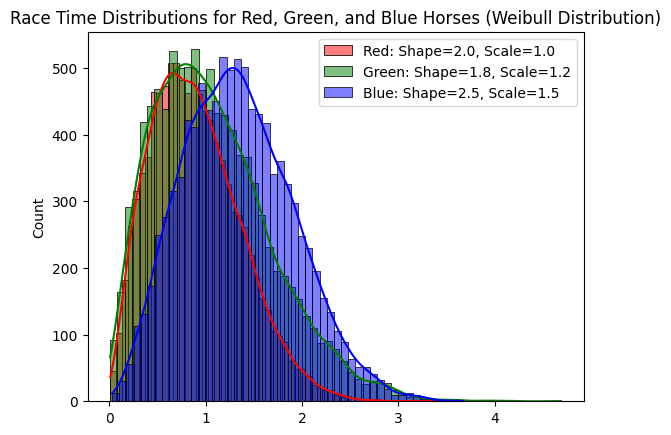

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of races to simulate
num_races = 10000

# Weibull distribution parameters (shape 'k', scale 'lambda')
shape_red = 2.0
scale_red = 1.0
shape_green = 1.8
scale_green = 1.2
shape_blue = 2.5
scale_blue = 1.5

# Generate times for each horse in a large number of races using Weibull distribution
red_times = np.random.weibull(shape_red, size=num_races) * scale_red
green_times = np.random.weibull(shape_green, size=num_races) * scale_green
blue_times = np.random.weibull(shape_blue, size=num_races) * scale_blue

# Stack all times into a matrix
all_times = np.stack([red_times, green_times, blue_times], axis=1)

# Determine the winner in each race by finding the horse with the smallest time
winners = np.argmin(all_times, axis=1)

# Calculate probabilities of each horse winning
red_wins = np.sum(winners == 0) / num_races
green_wins = np.sum(winners == 1) / num_races
blue_wins = np.sum(winners == 2) / num_races

# Print the win probabilities
print(f"Red win probability: {red_wins:.2f}")
print(f"Green win probability: {green_wins:.2f}")
print(f"Blue win probability: {blue_wins:.2f}")

# Function to count second place
def second_place_count(winners, horse_index):
    second_place = []
    for i in range(num_races):
        mask = np.delete(all_times[i], winners[i])
        second = np.argmin(mask)
        second_place.append(second)
    second_place = np.array(second_place)
    return np.sum(second_place == horse_index) / num_races

# Calculate the empirical second-place probabilities
red_second = second_place_count(winners, 0)
green_second = second_place_count(winners, 1)
blue_second = second_place_count(winners, 2)

# Print the second-place probabilities
print(f"Red second probability: {red_second:.2f}")
print(f"Green second probability: {green_second:.2f}")
print(f"Blue second probability: {blue_second:.2f}")

# Function to check if Luce Choice Axiom holds
def luce_choice_check(winners, win_probs, horse_order):
    results = []
    for i in range(3):  # Check for each possible winner
        empirical_second_probs = []
        theoretical_second_probs = []

        for j in range(3):  # Check for each horse being second
            if i != j:
                # Calculate empirical second-place probability when horse i wins
                mask = winners == i
                remaining_times = np.delete(all_times[mask], i, axis=1)
                empirical_second = np.mean(np.argmin(remaining_times, axis=1) == (j if j < i else j-1))

                # Calculate the theoretical second-place probability based on Luce's axiom
                theoretical_second = win_probs[j] / (1 - win_probs[i])

                empirical_second_probs.append(empirical_second)
                theoretical_second_probs.append(theoretical_second)

        results.append({
            'winner': horse_order[i],
            'empirical_second_probs': empirical_second_probs,
            'theoretical_second_probs': theoretical_second_probs
        })
    return results

# Check if Luce Choice Axiom holds
horse_order = ['Red', 'Green', 'Blue']
win_probs = [red_wins, green_wins, blue_wins]
luce_results = luce_choice_check(winners, win_probs, horse_order)

# Display results
for result in luce_results:
    print(f"\nWhen {result['winner']} wins:")
    for j, horse in enumerate(horse_order):
        if horse != result['winner']:
            print(f"  Empirical second-place probability for {horse}: {result['empirical_second_probs'][j-1]:.3f}")
            print(f"  Theoretical second-place probability for {horse}: {result['theoretical_second_probs'][j-1]:.3f}")

# Plot the distributions for visual reference
sns.histplot(red_times, color="red", kde=True, label=f"Red: Shape={shape_red}, Scale={scale_red}")
sns.histplot(green_times, color="green", kde=True, label=f"Green: Shape={shape_green}, Scale={scale_green}")
sns.histplot(blue_times, color="blue", kde=True, label=f"Blue: Shape={shape_blue}, Scale={scale_blue}")
plt.legend()
plt.title("Race Time Distributions for Red, Green, and Blue Horses (Weibull Distribution)")
plt.show()
